<a href="https://colab.research.google.com/github/Rahullnitp/Social_Media_Sentiment_Analysis/blob/master/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis
The objective of this project is to detect hate speech in tweets i.e. if it has racist or sexist sentiment associated with it.
So,the task is to classify racist or sexist tweets from other tweets.

###Importing_Packages_And_Data

In [0]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
import warnings
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv('/content/drive/My Drive/sentiment analysis data/train_E6oV3lV.csv')
test=pd.read_csv('/content/drive/My Drive/sentiment analysis data/test_tweets_anuFYb8.csv')
submission=pd.read_csv('/content/drive/My Drive/sentiment analysis data/sample_submission_gfvA5FD.csv')

In [0]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


The data has 3 columns -> id, label, and tweet. label is the binary target variable and tweet contains the tweets that we will clean and preprocess.

where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, our objective is to predict the labels on the given test dataset.

###Preprocessing and Cleaning

Before preprocessing we have to combine test and train set to prevent the trouble of performming the same step twice on test and train.

In [0]:
data=train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


#### i). Removing_Twitter_Handles
The twitter handles are already masked as @user due to privacy concerns.So,these twitter handles are  hardly giving any informationabout the nature of the tweet.

In [0]:
#User defined function to remove unwanted text patterns from tweets.
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for i in r:
    input_txt=re.sub(i,'',input_txt)
  return input_txt

In [0]:
#the new column after removing handles is "tweet_handle"
data['clr_tweet']=np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")

In [0]:
data.head()

,id,label,tweet,clr_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


####ii).Removing Special Characters, Punctuation and Numbers

In [0]:
data['clr_tweet']=data['clr_tweet'].str.replace("[^a-zA-Z#]"," ")

####iii).Remove Short Words

In [0]:
data['clr_tweet']=data['clr_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
data.head()

,id,label,tweet,clr_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


####iv).Tokenization

In [0]:
token_tweet=data['clr_tweet'].apply(lambda x:x.split())
token_tweet.head()   

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clr_tweet, dtype: object

####v).Stemming

In [0]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
TokenStemTweet=token_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
TokenStemTweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clr_tweet, dtype: object

In [0]:
for i in range(len(TokenStemTweet)):
  TokenStemTweet[ i]=' '.join(TokenStemTweet[i])

data['clr_tweet']=TokenStemTweet

In [0]:
data.head()

,id,label,tweet,clr_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


###Visualization of data

in this section we will explore clean tweet text with the help of few questions like what are the most common word in the dataset,most common dataset for negative and positive tweets .

####i).Most_Common_Word
One way to accomplish this task is by understanding the common word by plotting wordclouds.


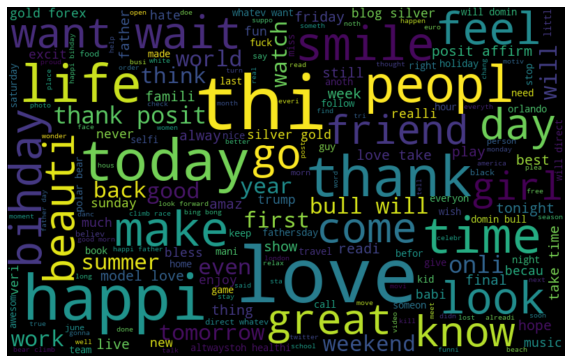

In [0]:
total_words=' '.join([tweet for tweet in data['clr_tweet']])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(total_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

####ii).Non Racist/Sexist tweets WordCloud
In this section we wil plot tweet with label 0 i.e. non-racist/non-sexist tweets.

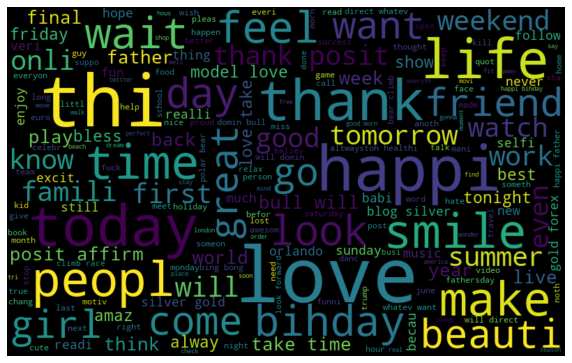

In [0]:
normal_words=' '.join([tweet for tweet in data['clr_tweet'][data['label']==0]])
word_cloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

####iii).Racist/Sexist tweets WordCloud
In this section we wil plot tweet with label 0 i.e. racist/sexist tweets.

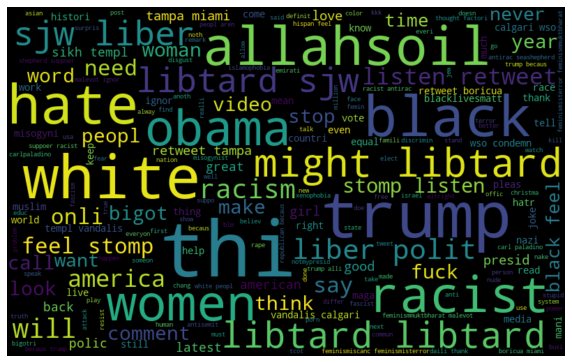

In [0]:
negative_words=' '.join([tweet for tweet in data['clr_tweet'][data['label']==1]])
word_cloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

####iv).Hashtags Imacts on tweets sentiment 

In [0]:
#function for collecting hashtags
def Collect_Hashtags(x):
  hashtags=[]
  for i in x:
    word=re.findall(r"#(\w+)",i)
    hashtags.append(word)
  return hashtags

In [0]:
#hashtahs from normal tweets
hashtags_normal=Collect_Hashtags(data['clr_tweet'][data['label']==0])

#hashtags from racist/sexist tweets
hashtags_negative=Collect_Hashtags(data['clr_tweet'][data['label']==1])

In [0]:
#unnesting list
hashtags_normal=sum(hashtags_normal,[])
hashtags_negative=sum(hashtags_negative,[])

####v).Plotting hashtags_normal

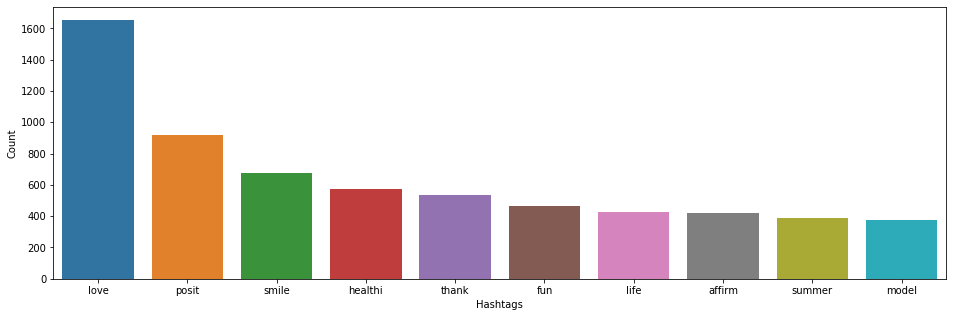

In [0]:
FD=nltk.FreqDist(hashtags_normal)
d=pd.DataFrame({'Hashtags':list(FD.keys()),
                'Count':list(FD.values())})
#selecting top 10 most frequent hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtags",y="Count")
ax.set(ylabel='Count')
plt.show()

####vi).Plotting hashtags_negative

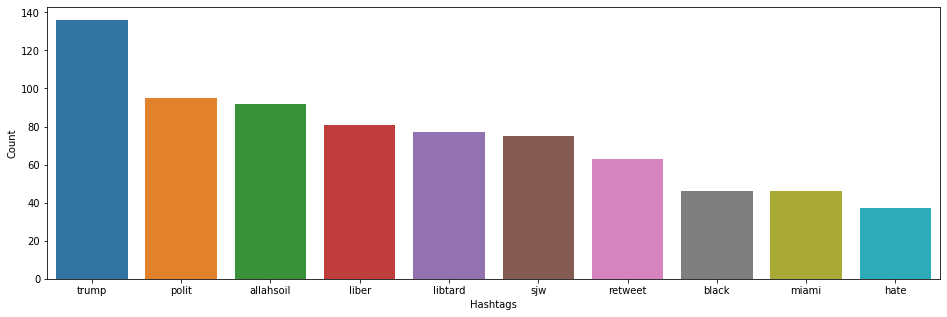

In [0]:
FD_negative=nltk.FreqDist(hashtags_negative)
d_negative=pd.DataFrame({'Hashtags':list(FD_negative.keys()),
                         'Count':list(FD_negative.values())})
#selecting top 10 most frequent negative hashtags
d_negative=d_negative.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d_negative,x="Hashtags",y="Count")
ax.set(ylabel="Count")
plt.show()

###Feature_Extraction
For the analysis of preprocessed data, it needs to be converted into features using Bags-of-words,TF-IDF,or Word Embedding.

####i).Bag-of-Words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
word_vector_BoW=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

words_BoW=word_vector.fit_transform(data['clr_tweet'])

####ii).TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vector_TF_IDF=TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

words_TF_IDF=word_vector_TF_IDF.fit_transform(data['clr_tweet'])